In [ ]:
## Ejercicio 5.

In [ ]:
#Para los datos de 'Coactivation_matrix.mat', filtre la matriz para que, para cada nodo, se mantenga aquel nodo 
#con mayor comunicación, con el nuevo arreglo muestre los nodos y vértices del grafo

In [1]:
# Importar paqueterías
import numpy as np
import pandas as pd
import scipy.io
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx

In [7]:
# Cargar archivos
mat_path = r"Coactivation_matrix.mat"
mat_json = scipy.io.loadmat(mat_path)

In [17]:
# Diccionarios
mat_dict = {k: v for k, v in mat_json.items() if k[0] != '_'}
df = pd.DataFrame(mat_dict['Coactivation_matrix'])
mat_dict

# Matriz de Adyacencia
G = nx.from_pandas_adjacency(df, create_using=nx.DiGraph)

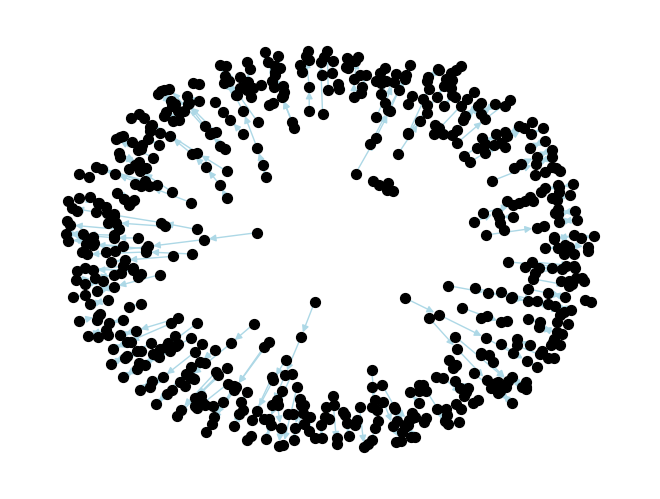

In [19]:
# Nodos + conectados (dejar c/u con su correspondiente de mayor peso)
for node in G.nodes():
    edges = G[node]
    if edges:
        vecinoMax = max(edges.items(), key=lambda x: x[1]['weight'])[0]
        for vecinos in list(edges.keys()):
            if vecinos != vecinoMax:
                G.remove_edge(node, vecinos)

# Graficar
nx.draw(G, node_color='black', edge_color='lightblue', node_size=50)

In [23]:
# Matriz-> Data Frame-> Array
df_adj = nx.to_pandas_adjacency(G)
adj_matrix = df_adj.to_numpy()
graph_list = list(G.adjacency())
graph_list

[(0, {1: {'weight': 0.16071428571428573}}),
 (1, {0: {'weight': 0.16071428571428573}}),
 (2, {3: {'weight': 0.22419928825622776}}),
 (3, {2: {'weight': 0.22419928825622776}}),
 (4, {84: {'weight': 0.1625615763546798}}),
 (5, {12: {'weight': 0.21367521367521367}}),
 (6, {20: {'weight': 0.17405063291139242}}),
 (7, {154: {'weight': 0.2161654135338346}}),
 (8, {11: {'weight': 0.23469387755102042}}),
 (9, {23: {'weight': 0.2523809523809524}}),
 (10, {15: {'weight': 0.14093959731543623}}),
 (11, {8: {'weight': 0.23469387755102042}}),
 (12, {5: {'weight': 0.21367521367521367}}),
 (13, {9: {'weight': 0.10328638497652583}}),
 (14, {21: {'weight': 0.16666666666666666}}),
 (15, {498: {'weight': 0.1619047619047619}}),
 (16, {19: {'weight': 0.283495145631068}}),
 (17, {15: {'weight': 0.11510791366906475}}),
 (18, {12: {'weight': 0.17083333333333334}}),
 (19, {16: {'weight': 0.283495145631068}}),
 (20, {6: {'weight': 0.17405063291139242}}),
 (21, {449: {'weight': 0.171875}}),
 (22, {431: {'weight':

In [25]:
# Verificando...
df_adj

,0,1,2,3,4,5,6,7,8,9,...,628,629,630,631,632,633,634,635,636,637
0,0.000000,0.160714,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,0.160714,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.224199,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,0.000000,0.000000,0.224199,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.196721,0.0,0.0,0.0
634,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.196721,0.000000,0.0,0.0,0.0
635,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.111650,0.0,0.0,0.0
636,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [27]:
# Coordenadas*
# Diccionarios
mat_dict = {k: v for k, v in mat_json.items() if k[0] != '_'}
df = pd.DataFrame(mat_dict['Coactivation_matrix'])
mat_dict

x = mat_dict['Coord'][:, 0] 
y = mat_dict['Coord'][:, 1] 
z = mat_dict['Coord'][:, 2]  

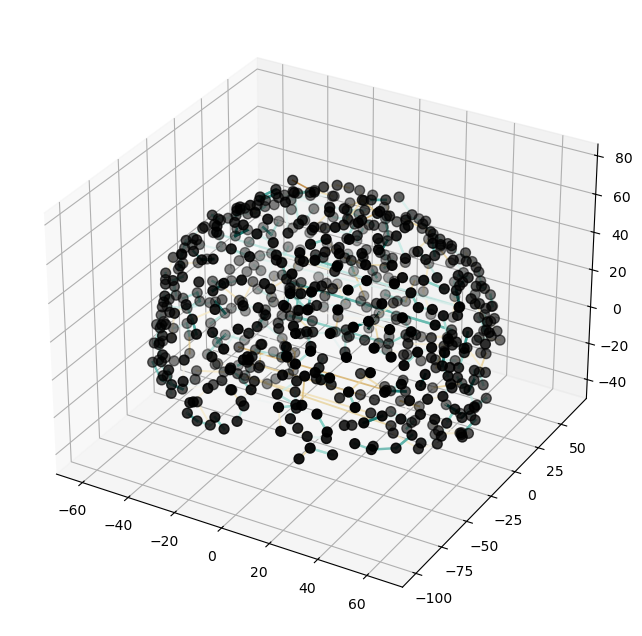

In [31]:
import matplotlib.cm as cm

# Establecer parámetros 
colormap = cm.BrBG
peso_Max = np.max(adj_matrix) if np.max(adj_matrix) > 0 else 1  # Pesos: 0-1
pesosNormalizados = adj_matrix / peso_Max  


# Graficar
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Nodes
ax.scatter3D(x, y, z, color='black', s=50)

# Edges
for i in range(len(adj_matrix)):
    for j in range(len(adj_matrix)):
        weight = adj_matrix[i, j]
        if weight > 0:  #Sólo non zero edges
            color = colormap(pesosNormalizados[i, j])  #Color of edges according to weight
            ax.plot(
                [x[i], x[j]],  
                [y[i], y[j]], 
                [z[i], z[j]],  
                color=color, alpha=0.8, lw=1 + 3 * weight  
            )
plt.show()

# Ángulo
ax.view_init(elev=20., azim=30)